<div style="border:solid Chocolate 2px; padding: 40px">

<b>Полина, привет!👋</b>

Меня зовут Арина Уксусова, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на ты, но если это не удобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>
    
<br/>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Проект: Принятие решений в бизнесе

## Описание проекта

Необходимо приоритезировать гипотезы, созданные совместно с отделом маркетинга, запустить A/B-тест и проанализировать результаты.

## Цели и задачи проекта

- Приоритезация гипотез;
- узнать куммулятивные выручку и средний чек разных групп;
- сравнить показатели группы А и В;
- узнать есть ли аномальные значения в группах;
- сделать выводы о результатах теста и принять одно из возможных решений.

## Описание данных

Данные для первой части

Файл /datasets/hypothesis.csv.

- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv. 

- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

- date — дата;

- group — группа A/B-теста;

- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## План работы

* Загрузка данных
* Предобработка данных
* Анализ A/B-теста
* Принятие решений

## 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')
import datetime as dt

%matplotlib inline

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [2]:
try:
  hipothesis = pd.read_csv('hypothesis.csv')
  orders = pd.read_csv('orders.csv')
  visitors = pd.read_csv('visitors.csv')
except:
  hipothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
  orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
  visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Здорово, что ты использовала конструкцию try-except для подгрузки данных. Помимо try-except можно использовать методы модуля os (https://pythonworld.ru/moduli/modul-os.html)
    
Пример функции может быть таким:
    
![image.png](attachment:image.png)
    
Еще несколько полезных материалов по try-except:
    
https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html
    
https://www.programiz.com/python-programming/exception-handling
    
https://towardsdatascience.com/do-not-abuse-try-except-in-python-d9b8ee59e23b
    
https://www.techbeamers.com/use-try-except-python/
    
P.S. Стоит быть аккуратнее с indents (отступами блоков кода), если jyputer подсвечивает красным твой код, значит, indents расставлены некорректно:
    
![image-2.png](attachment:image-2.png)
</div>

In [3]:
hipothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
hipothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в данных нет, но столбец date в двух датафреймах имеет тип 'object', привелем его к типу 'datetime'. Также для удобства приведем названия столбцов датафрейма hipothesis к нижнему регистру.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
hipothesis.columns = hipothesis.columns.str.lower()

In [10]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

Посмотрим сколько групп учавствует в тесте.

In [11]:
orders.group.unique()

array(['B', 'A'], dtype=object)

In [12]:
orders.agg({'date':['min', 'max']})

,date
min,2019-08-01
max,2019-08-31


In [13]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [14]:
orders['transaction_id'].duplicated().sum()

0

In [15]:
print(orders.duplicated().sum(), visitors.duplicated().sum())

0 0


In [16]:
count_group = orders.groupby('visitor_id', as_index=False)[['visitor_id', 'group']].agg({'group':'nunique'})
# count_group.column = ['visitor_id', 'count_group']
count_group = count_group[count_group['group'] >= 2]
count_group.shape

(58, 2)

In [17]:
orders[orders['visitor_id'] == 8300375]

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


In [18]:
list_filter = list(count_group['visitor_id'])
orders_filtered = orders.query('visitor_id not in @list_filter')

In [19]:
orders_filtered['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

<div class="alert alert-info">
<h2> Комментарий студента VERS#1<a class="tocSkip"></h2>
Я проверила выборку и выделила всех посетителей с двумя уникальными группами. Исследование количества посещений показывает, что клиент мог посещать магазин больше чем 2 раза.
В связи с этим удаление из заказов посетителей с двумя группами привело к уменьшению разрыва между количеством строк в группах на 3 единицы.
Выборка все равно получилась несбалансированной по группам.
Далее будем проводить анализ на полученной в результате фильтрации выборке.
Для этого переобозначим orders.
</div>  


In [20]:
orders = orders_filtered

Начало и конец тестирования

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
        
Стоит провести дополнительные исследования качества данных:

* сколько у нас групп в АВ-тесте;
* даты начала и окончания теста;
* сколько пользователей в каждой группе - по таблице с заказами;
* не попадают ли какие-то пользователи в обе группы - по таблице с заказами. Пересечение групп может повлиять на результаты анализа. В реальной практике тест скорее всего пришлось бы проводить заново. В рамках нашего проекта в качестве практики можно попробовать исключить таких пользователей из заказов, при этом нужно иметь в виду, что корректно исключить их из визитов не получится, так как данные в этом датасете агрегированы.
* также стоит провести проверки данных на дубликаты и пропуски (не просто через info, а с использованием методов)
    
  

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>
</div>

## Часть 1. Приоритизация гипотез.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета ICE:


\begin{align}
        ICE = \frac{impact * confidence} {efforts}
\end{align}


In [21]:
hipothesis['ice'] = hipothesis['impact'] * hipothesis['confidence'] / hipothesis['efforts']
hipothesis.sort_values(by='ice', ascending=False, inplace=True)

In [22]:
hipothesis

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


После приоритизации методом ICE на первое место вышла гипотеза под номером 8

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета RICE:


\begin{align}
        RICE = \frac{reach * impact * confidence} {efforts}
\end{align}


In [23]:
hipothesis['rice'] = hipothesis['reach'] * hipothesis['impact'] * hipothesis['confidence'] / hipothesis['efforts']
hipothesis.sort_values(by='rice', ascending=False, inplace=True)

In [24]:
hipothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


После приоритизации методом ICE на первое место вышла гипотеза под номером 7.

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Различие в приоритетах гипотез заключается в том, что ICE не учитывает reach - — скольких пользователей затронет изменение, которое мы хотим внести. У гипотезы 7 максимально возможная оценка, остальные показатели также высоки. Параметр efforts - цена теста этой гипотезы не такой большой в сравнении с другими гипотезами, у которых высокие reach, impact и confidence.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Верное наблюдение про результаты по фреймворку RICE: добавление этого параметра влияет на порядок гипотез и их приоритет за счет параметра Reach. Плюс за добавление формул.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
И еще несколько рекомендаций для улучшения шага (носят рекомендательный характер и являются развивающей обратной связью, при желании и возможности можно имплементировать часть (или все) рекомендации, а можно просто взять на вооружение🙌):
        
  
 * результаты можно было бы  объединить в единой таблице. Также их можно было бы проранжировать и выделить цветом — https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html 
        
еще материал по теме оформления таблиц в pandas:
        
https://pbpython.com/styling-pandas.html
        
    
* в качестве визуализации изменения приоритетов можно использовать <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a>, <a href="https://chart-studio.plotly.com/~pcchang/224/slopegraph-spending-and-academic-performance-by-states-doc/#/">реализация на plotly</a>
        
И еще несколько ссылок для ознакомления с тем, как строить такие графики:
        
<a href="https://towardsdatascience.com/slope-charts-with-pythons-matplotlib-2c3456c137b8">раз</a>        
      
<a href="https://cduvallet.github.io/posts/2018/03/slopegraphs-in-python">два</a>     

      
<a href="https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib">три</a>     



## Часть 2. Анализ A/B-теста.

### 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [25]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
date_group = orders[['date', 'group']].drop_duplicates()
orders_agg = date_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max', 
                                                                                                                                'group': 'max', 
                                                                                                                                'transaction_id': 'nunique', 
                                                                                                                                'visitor_id': 'nunique', 
                                                                                                                                'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_agg = date_group.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date': 'max', 
                                                                                                                                'group': 'max', 
                                                                                                                                'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])
cumulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [27]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [28]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

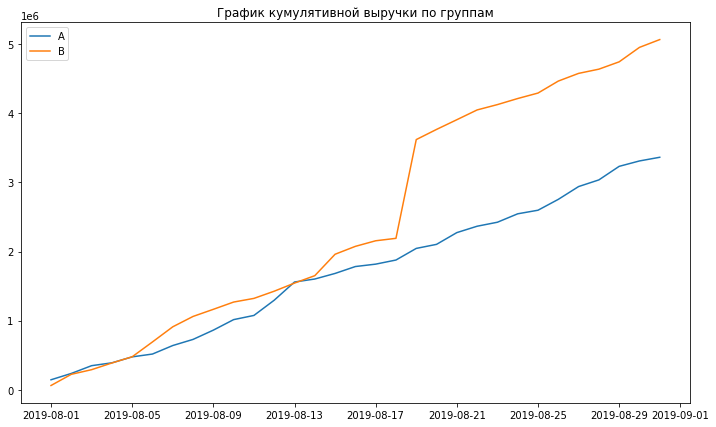

In [29]:
plt.rcParams["figure.figsize"] = (12,7)
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.legend();

Выручка группы 'B' намного превышает выручку группы 'A'. Лидировать группа начала чуть раньше середены теста. Возможно есть аномальные заказы, возможно группы поделили не 50/50 по какому-то признаку.

### 2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

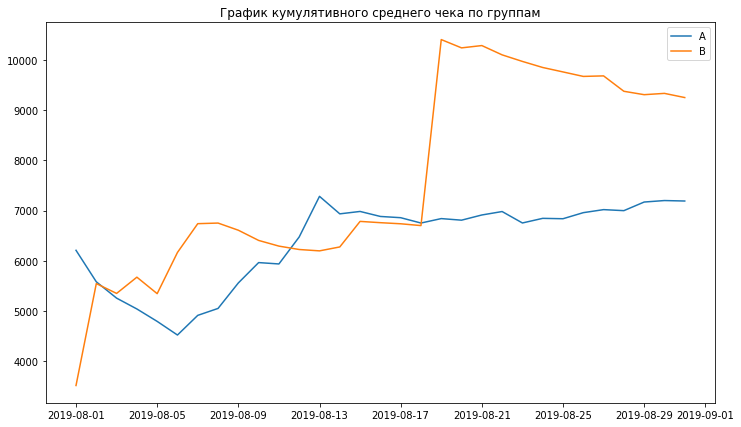

In [30]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Где-то в середине теста средний чек в группе 'B' резко вырос, потом начал падать. Версия об аномальных заказах кажется наиболее вероятной. Прежде чем делать выводы необходимо проверить данные на аномальные заказы.

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [31]:
merge_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on=['date'], right_on=['date'], how='left', suffixes=['_a', '_b'])
merge_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


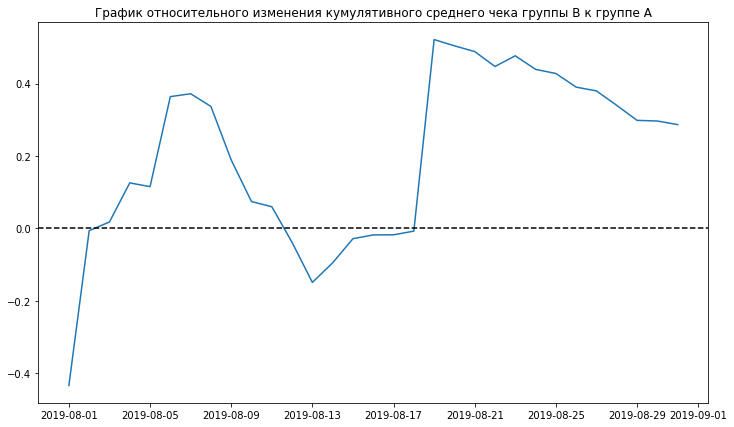

In [32]:
plt.plot(merge_revenue['date'], (merge_revenue['revenue_b'] / merge_revenue['orders_b']) / (merge_revenue['revenue_a'] / merge_revenue['orders_a'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--');

Средний чек аномально растет и падает в несколько дат, вероятнее всего в эти даты были сделаны аномальные заказы. В большинстве времени средний чек группы 'B' больше, чем у группы 'A'.

### 4. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

In [33]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

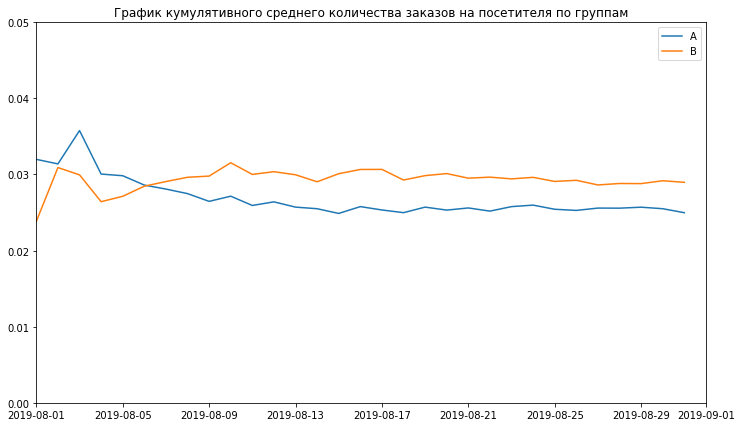

In [34]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

Утсановим нужный масштаб графика, чтобы лишние колебания не мешали анализу. Видно, что конверсии вышли на "плато", конверсия 'B' практически на протяжении всего теста больше, что у 'A'.

### 5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

In [35]:
merge_conversion = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
merge_conversion.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


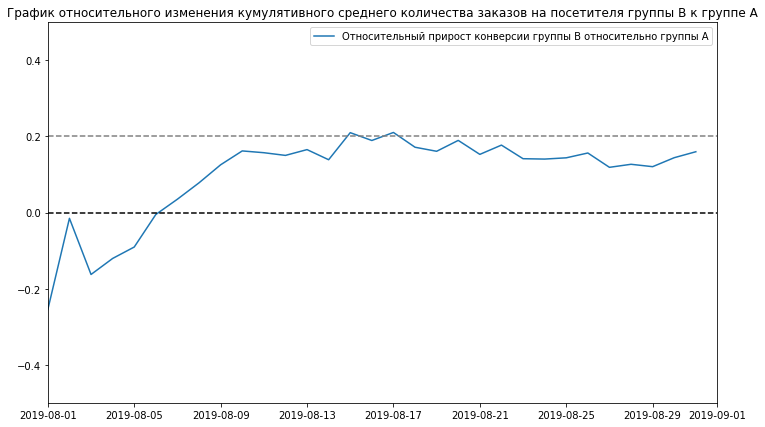

In [36]:
plt.plot(merge_conversion['date'], merge_conversion['conversion_b'] / merge_conversion['conversion_a']-1, label = 'Относительный прирост конверсии группы B относительно группы A')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])
plt.legend();

Почти с самого начала группа 'B' лидирует по конверсии, достигает своего максимума в 20% где-то в середине теста.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Графики выглядят верно, согласна с интерпретацией визуализации, плюс за оформление визуализации.
    


### 6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [37]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(orders_by_users)))

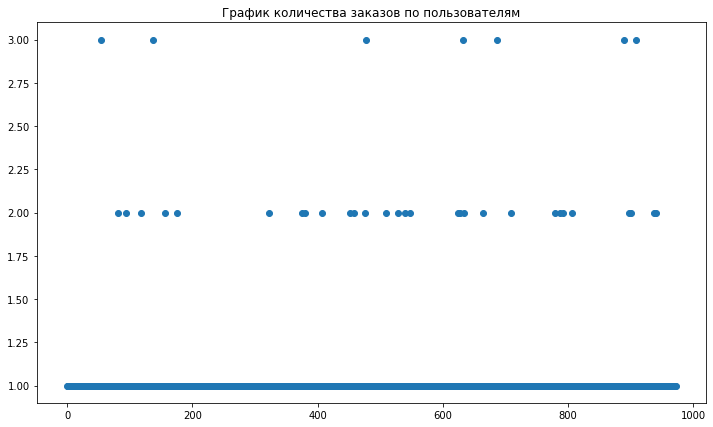

In [38]:
plt.scatter(x_values, orders_by_users['orders'])
plt.title('График количества заказов по пользователям');

Большинство пользователей делали 1-2 заказа. Некоторые делали больше 10, это определенно аномальные значеения. Кажется, что больше 4 заказов делало мало пользователей и можно считать это значение аномальным. Проверим это в следующем шаге.

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [39]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Оказалось, что 95% пользователей сделали 1 заказ, больше 2 заказов сделали лишь 1% пользователей. Возьмем за граничной значение 1. Если у пользователей больше 1 заказа, то это аномалия.

### 8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [40]:
x_value_orders = pd.Series(range(0, len(orders['revenue'])))

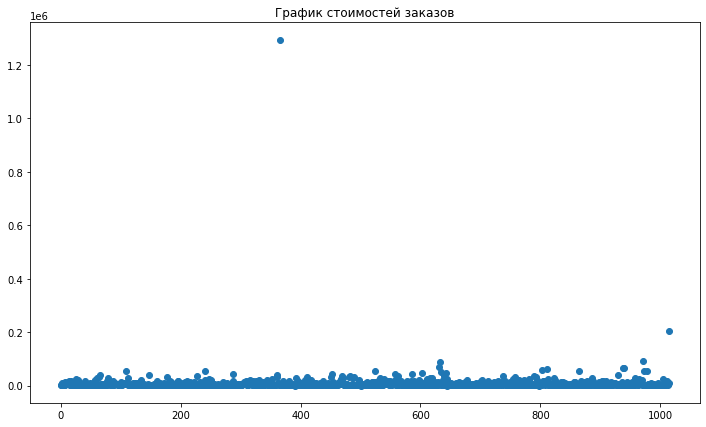

In [41]:
plt.scatter(x_value_orders, orders['revenue'])
plt.title('График стоимостей заказов');

Практически все заказы меньше 200 000. Но выбросы присутствуют, скорее всего граница будет меньше 200 000.

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [42]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Лишь 5% заказов больше 26785, но встречают и заказы больше миллиона. За границу возьмем 26785.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Границы выбросов определены верно:)
    


### 10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

H0: различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет;

H1: различия есть.

In [43]:
orders_by_users.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [44]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
visitors_a_cumulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cumulative.columns = ['date', 'visitors_a_cumulative']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cumulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cumulative.columns = ['date', 'visitors_b_cumulative']


In [45]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cumulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cumulative.columns = [
    'date',
    'orders_cumulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cumulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cumulative.columns = [
    'date',
    'orders_cumulative_b',
    'revenue_cummulative_b',
]

In [46]:
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cummulative_a,orders_cumulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_a_cumulative,visitors_b_cumulative
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [47]:
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users_a.columns = ['visitor_id', 'orders']
orders_by_users_b =orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users_b.columns = ['visitor_id', 'orders']

In [48]:
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(st.mannwhitneyu(sample_a, sample_b, alternative="two-sided")[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.01102
0.160


p-value меньше 0.05, значит нулевую гипотезу отвергаем. Анализ "сырых" данных говорит о том, что между группами есть статистически значимые различия. Относительный прирост среднего группы 'B' к конверсии группы 'A' равен 16%.

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

H0: различий в среднем чеке заказа по посетителю между группами по "сырым" данным нет;

H1: различия есть.

In [49]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'], alternative="two-sided")[1]))
print('{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

0.829
0.287


p-value больше 0.05 - статистически значимых различий между средними чеками в группах нет. Относительное различие среднего чека между сегментами 28.7% - кажется, что это много.

### 12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

H0: различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет;

H1: различия есть.

Для начала найдем id пользователей, которые считаются аномальными (Количество заказов больше 1 и заказ на сумму больше 26785).

In [50]:
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > 1]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > 1]['visitor_id']
], axis=0)

users_with_expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']

abnormal_users = pd.concat([
    users_with_many_orders, users_with_expensive_orders
], axis=0).drop_duplicates().sort_values()

abnormal_users.head()

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64

Создадим выборки без учета аномальных пользователей.

In [51]:
sample_a_filtered = pd.concat([
    orders_by_users_a[
        np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
    ]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
             name='orders',),
], axis=0,)

sample_b_filtered = pd.concat([
    orders_by_users_b[
        np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
    ]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
             name='orders',),
], axis=0,)

print('{0:.5f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered, alternative="two-sided")[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.01593
0.174


p-value меньше 0.05, как и сырыми данными. Группа 'B' лучше группы 'A'.

### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайем выводы и предположения.

H0: различий в среднем чеке заказа между группами по "очищенным" данным нет;

H1: различия есть.

In [52]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        alternative="two-sided")[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.727
-0.034


p-value больше 0.05, статистически значимых различий нет. Относительное различие между сегментами -3%, получается здесь группа 'A' показала себя лучше, чем по сырым данным (29% в пользу 'B'), причина в аномальных заказах.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошая работа! Тест для проверки гипотез выбран верно.
</div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> 
    
Важно сформулировать по паре гипотез перед каждом из 4 тестов, перед их проведением, то есть общая пара гипотез нам не подойдет в данном случае:)
    
Также стоит интерпретацию результатов теста (p-value) привязывать к формулировкам гипотез.

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>
    
Согласна с формулировками гипотез и скорректированными выводами:)
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Несколько рекомендацией по этому шагу анализа (носят рекомендательный характер и являются развивающей обратной связью, при желании и возможности можно имплементировать часть (или все) рекомендации, а можно просто взять на вооружение🙌):

* есть особенность в реализации теста Манна-Уитни <code>stats.mannwhitneyu</code>, тест имеет параметр <code>alternative</code>, по-умолчанию, он принимает значение <code>None</code> для совместимости, но в таком случае тест выполняет проверку похожую на одностороннюю, что не совсем корректно для нашего теста. Более корректные результаты можно получить, используя <code>alternative="two-sided"</code>
    
Подробнее о проверках можно почитать вот в этой [статье](http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm#:~:text=An%20alternative%20hypothesis%20may%20be,the%20direction%20does%20not%20matter.) 
        
В новой версии библиотеки scipy этот аргумент специфицируется по дефолту. В более старых версиях - его важно специфицировать. 
   
* и еще про проблему выбора теста (одностороннего или двустороннего ты можешь почитать по ссылкам ниже):
        
`A two-tailed test is appropriate if you want to determine if there is any difference between the groups you are comparing. For instance, if you want to see if Group A scored higher or lower than Group B, then you would want to use a two-tailed test. This is because a two-tailed test uses both the positive and negative tails of the distribution. In other words, it tests for the possibility of positive or negative differences.`

`A one-tailed test is appropriate if you only want to determine if there is a difference between groups in a specific direction. So, if you are only interested in determining if Group A scored higher than Group B, and you are completely uninterested in possibility of Group A scoring lower than Group B, then you may want to use a one-tailed test.`
    
Источник: https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/#:~:text=This%20is%20because%20a%20two,groups%20in%20a%20specific%20direction.
    
И еще несколько ссылок по этому вопросу:
    
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html
    
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/
    
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/
        
* чтобы аргументировать применение теста Манна-Уитни (один из аргументов - ненормальность распределения), можно проверить выборки на нормальность распределения, с этой задачей справится тест Шапиро:
        
реализация на Python
        
https://www.statology.org/shapiro-wilk-test-python/
        
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
        
https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5

### Решение по результатам теста.

В ходе исследования вяснилось, что различия между конверсиями групп есть. 13.8% по "сырым" данным, 17.4% по "очищенным". Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на ~26%, все дело в аномальных заказах. Это исследование напомнило как аномалии могут искажать результ, и забывать об очистке данных нельзя!

Результаты теста показали, что сегмент 'B' значительно лучше, хоть по средним сегмент 'A' лучше на 2%. Тестирование можно останавливать.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Полина, спасибо за твой проект! Ты приложила много усилий, чтобы довести его до конца, все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! У меня есть несколько рекомендаций, над которыми стоит поработать.

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
* Ты активно работала с визуализацией, хорошо, что ты используешь графики в работе над проектами!
* Тест для проверки гипотез выбран верно, интерпретация результатов теста также корректна:)
* Проект в целом хорошо структурирован и оформлен, это плюс:)

    
**На что стоит обратить внимание:🙂**:

* Важно сформулировать гипотезы в случае каждого теста.
* Попробуй найти пользователей, попавших в обе группы и провести другие проверки качества данных
* Можно поработать над комментариями в желтых блоках, носящих рекомендательный характер.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту:вторая итерация ревью**

Полина, спасибо, что прислала проект с доработками! Все основные моменты исправлены и скорректированы, хорошая работа! 
    
Спешу тебе сообщить, что твой проект принят и ты можешь перейти на следующий спринт🐱‍🏍
    
Желаю тебе крутых и интересных проектов на следующих спринтах🙌😉
    
С международным женским днем!

    
![gif](https://media.giphy.com/media/yf5t6Zj45o20ZGN2iA/giphy.gif)